# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


In [7]:
results.shape

(5000, 2)

## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

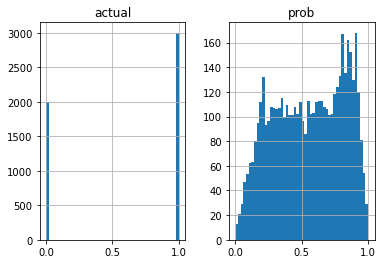

In [3]:
# insert code here
results.hist(bins=50)
plt.show()

There is no imbalane as actual values are in the ratio 2:3

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

In [9]:
Actual_1_df = results[results['actual'] == 1]# for true classes
probability_1_actual = Actual_1_df['prob'].tolist()
Actual_0_df = results[results['actual'] == 0]# for false classes
probability_0_actual = Actual_0_df['prob'].tolist()
print(len(probability_1_actual))
print(len(probability_0_actual))

3000
2000


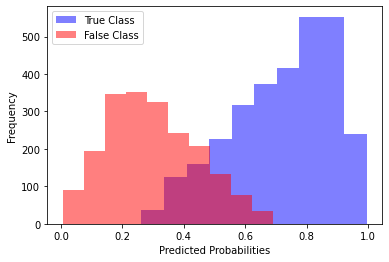

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sample predicted probabilities for True and False classes
Actual_1_df = results[results['actual'] == 1]
probability_1_actual = Actual_1_df['prob'].tolist()
Actual_0_df = results[results['actual'] == 0]
probability_0_actual = Actual_0_df['prob'].tolist()

plt.hist(probability_1_actual, bins=10, alpha=0.5, color='b', label='True Class')# ploting histogram for True classes
plt.hist(probability_0_actual, bins=10, alpha=0.5, color='r', label='False Class')#plotting histogram for false classes
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# this histogram combines both graphs

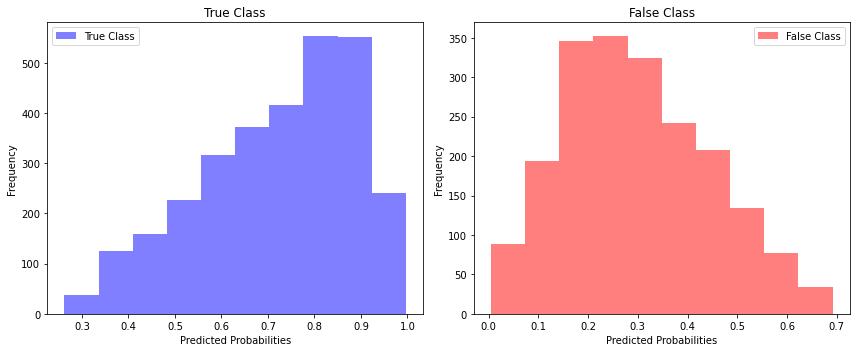

In [11]:
# this below graph is for separate classes
import matplotlib.pyplot as plt
import numpy as np


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(probability_1_actual, bins=10, alpha=0.5, color='b', label='True Class')
ax1.set_xlabel('Predicted Probabilities')
ax1.set_ylabel('Frequency')
ax1.set_title('True Class')
ax1.legend()
ax2.hist(probability_0_actual, bins=10, alpha=0.5, color='r', label='False Class')
ax2.set_xlabel('Predicted Probabilities')
ax2.set_ylabel('Frequency')
ax2.set_title('False Class')
ax2.legend()
plt.tight_layout()
plt.show()


From the plots we can say that the cases are almost eqully divided so there is no imbalance

We can observe that most of the values having less than 0.4 are false cases and more than 0.8 are true cases

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix
threshold = 0.5# given a threshold pf 0.5
# if the prob value is greater or equal to 0.5 it assigns true as prediction value else false
results['predicted'] = results['prob'] >= threshold
confusion = confusion_matrix(results['actual'], results['predicted'])# creating a confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1790  210]
 [ 377 2623]]


From the above confusion matrx we can say that it predicted pretty good as we can see good amount of true postivies and true negatives

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [26]:
# from the above confusion matrix we can separate the values like below
True_positives = confusion[0][0]
False_Negatives = confusion[1][0]
False_Positives = confusion[0][1]
True_Negatives = confusion[1][1]
print("True Positives",True_positives)
print("True Negativies",True_Negatives)
print("False Positives",False_Positives)
print("False Negatives",False_Negatives)

True Positives 1790
True Negativies 2623
False Positives 210
False Negatives 377


In [27]:
# Calculate accuracy
accuracy = (True_positives + True_Negatives) / (True_positives + True_Negatives + False_Positives + False_Negatives)

# Calculate precision
precision = True_positives / (True_positives + False_Positives)

# Calculate recall
recall = True_positives / (True_positives + False_Negatives)
print("Precision and Recall for actual 0.0")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("---------------------------------------")
precision = True_Negatives / (True_Negatives + False_Positives)
recall = True_Negatives / (True_Negatives + False_Negatives)
print("Precision and Recall for actual 1.0")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Precision and Recall for actual 0.0
Accuracy: 0.8826
Precision: 0.895
Recall: 0.8260267651130595
---------------------------------------
Precision and Recall for actual 1.0
Accuracy: 0.8826
Precision: 0.9258736321920226
Recall: 0.8743333333333333


-> A high precision  indicates that when the model predicts a positive case, it is correct about 92.57% of the time for true cases and 89 % for false casses. This might be important in cases where false positives are costly.

->A high recall  means the model correctly identifies 87.43% of all actual positive cases for true cases and 82.6 for false cases . This is important when it's critical not to miss positive cases, even at the cost of some false alarms.

So, I would consider using both precision and recall as evaluation metrics. 

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [32]:
results

,actual,prob,predicted
0,0.0,0.380052,False
1,1.0,0.827923,True
2,1.0,0.929093,True
3,1.0,0.472508,False
4,1.0,0.906988,True
...,...,...,...
4995,0.0,0.109184,False
4996,1.0,0.920730,True
4997,1.0,0.899630,True
4998,0.0,0.198838,False


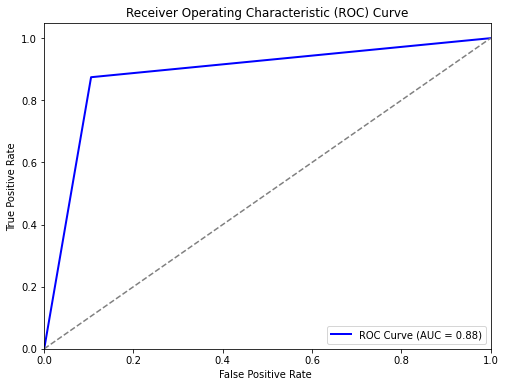

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Actual labels (ground truth) and predicted probabilities
actual = results['actual'] # Replace with your actual labels
predicted_probabilities = results['predicted'] # Replace with your predicted probabilities

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(actual, predicted_probabilities)
auc = roc_auc_score(actual, predicted_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


As we can see the ROC curve is close to top left corner value that means it is indicating a better model if it is close to diagonal it indicates weaker model.